# Predicting Stock Prices

Code generated from Youtube channel of Siraj Raval. See link: https://www.youtube.com/watch?v=ftMq5ps503w

Prediction closing price of S&P500 using LSTM network

In [1]:
!pip install pandas_datareader
import datetime
from pandas_datareader import data
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

    100% |████████████████████████████████| 71kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 593kB 2.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for requests-ftp ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/76/fb/0d/1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-ftp


Using TensorFlow backend.


## Importing and cleaning data

In [2]:
# Read Ticker Data from Yahoo
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2017, 3, 24)
ticker_sym = "^GSPC"

ticker_data = data.DataReader(ticker_sym, 'yahoo', start, end)
#ticker_data["rets"] = ticker_data["Adj Close"].pct_change()
ticker_data["Volume"] = ticker_data["Volume"].astype('Float64')
ticker_data.replace(to_replace='NaN', value=0, inplace=True)

In [3]:
ticker_data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,6862.000000,6862.000000,6862.000000,6862.000000,6.862000e+03,6862.000000
mean,1117.421218,1124.232095,1110.170499,1117.699466,2.051242e+09,1117.699466
std,502.579725,504.770326,500.211954,502.657434,1.780600e+09,502.657434
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991
25%,696.869995,702.582489,692.920028,696.869995,4.456025e+08,696.869995
50%,1142.869995,1149.960022,1135.005005,1142.840027,1.430350e+09,1142.840027
75%,1390.605011,1399.627502,1379.024963,1390.762512,3.462422e+09,1390.762512
max,2394.750000,2400.979980,2380.169922,2395.959961,1.145623e+10,2395.959961


In [4]:
ticker_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000.0,359.690002
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000.0,358.760010
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000.0,355.670013
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000.0,352.200012
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000.0,353.790009


In [5]:
X_train, y_train, X_test, y_test = lstm.load_data_from_dataframe(ticker_data, 50, True)

In [48]:
#X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [6]:
filename = 'model'

## Load pretrained model

In [7]:
def load_model(filename):
    # load json and create model
    json_file = open(filename, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(filename + "_weights.h5")
    return loaded_model

model = load_model(filename)
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

FileNotFoundError: [Errno 2] No such file or directory: 'model'

## Build the model with keras

In [8]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:

#batch_size = 1
def build_model():
    model = Sequential()

    model.add(LSTM(    
        input_dim=1,
        output_dim=50,
        return_sequences=True))
    model.add(Dropout(0.2))
   
    model.add(LSTM(
        input_dim=200,
        output_dim=200,
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        600,
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim = 1))
    model.add(Activation('linear'))
    
    return model
    
start = time.time()
model = build_model()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.5127546787261963


## Train the model

In [17]:
model.fit(
    X_train,
    y_train,
    batch_size = 2500,
    nb_epoch = 100,
    validation_split = 0.05,
    shuffle = True)

Train on 5823 samples, validate on 307 samples
Epoch 1/100
5823/5823 [==============================] - 6s - loss: 0.1452 - val_loss: 0.0031
Epoch 2/100
5823/5823 [==============================] - 5s - loss: 0.0696 - val_loss: 4.5315e-04
Epoch 3/100
5823/5823 [==============================] - 5s - loss: 0.0027 - val_loss: 3.8387e-04
Epoch 4/100
5823/5823 [==============================] - 5s - loss: 0.0015 - val_loss: 3.6479e-04
Epoch 5/100
5823/5823 [==============================] - 5s - loss: 0.0012 - val_loss: 4.0685e-04

## Make some predictions

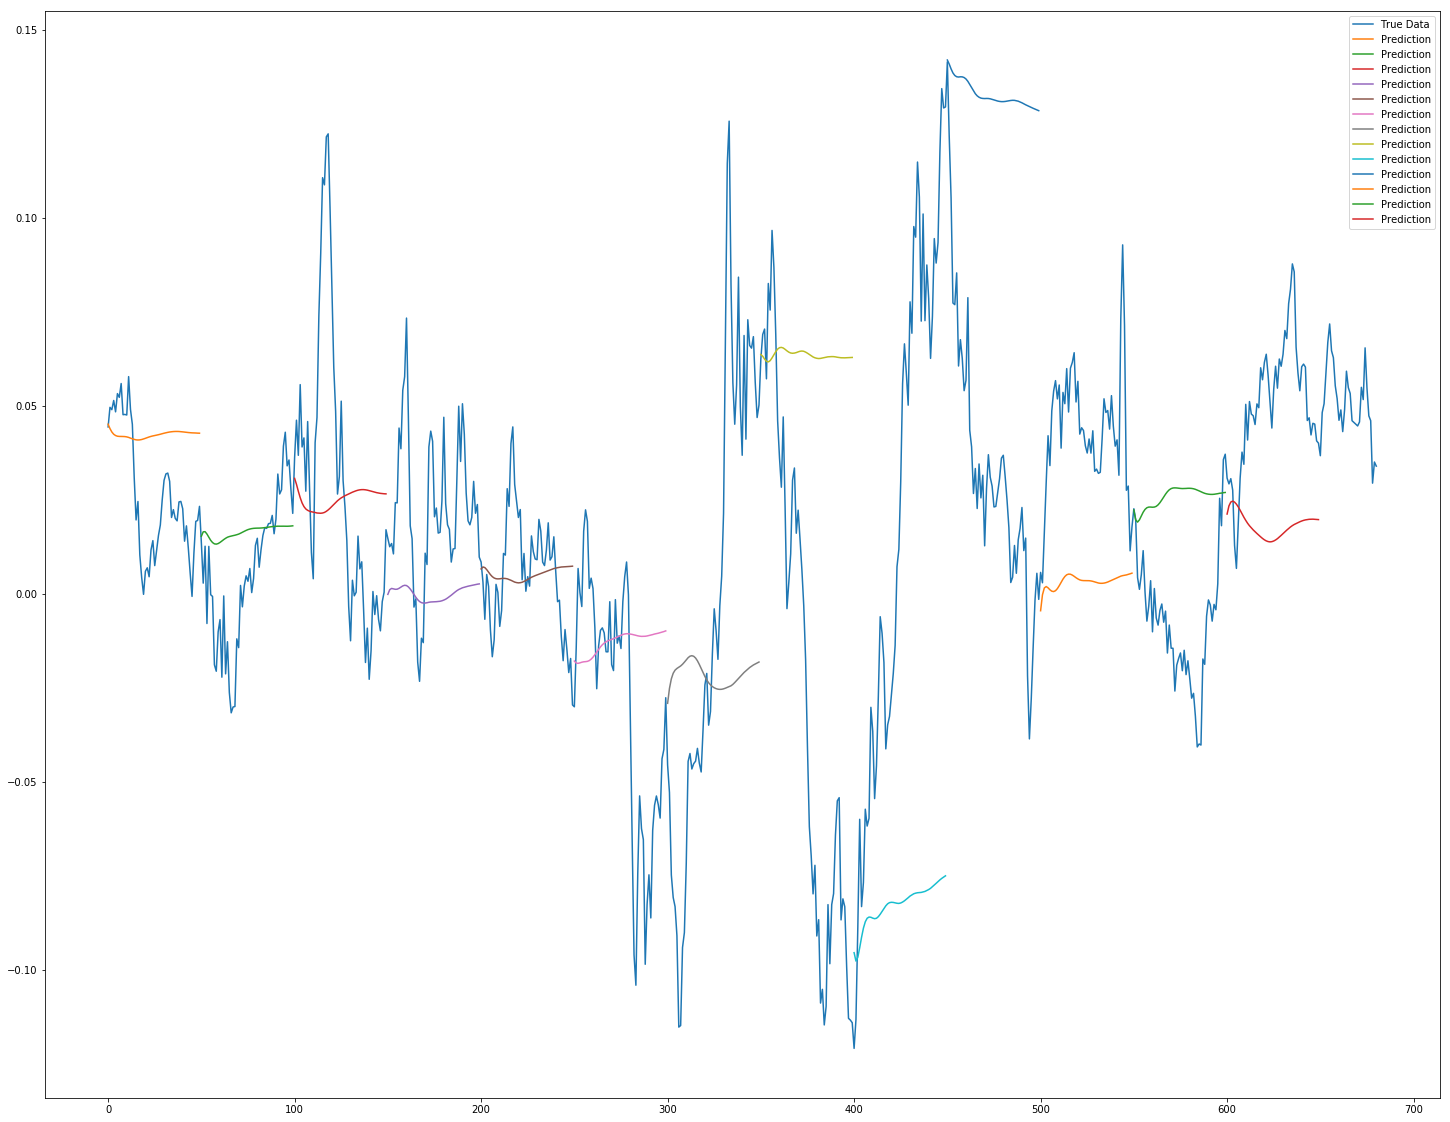

In [18]:
#!pip install mathplotlib
import matplotlib
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [12]:
!pip install simplejson
import simplejson
def save_model(model, filename='model.json'):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))
    weight_filename = filename + "_weights.h5"
    model.save_weights(weight_filename)

      
    
# save model after training
model_filename = 'predict_sp500.h5'
save_model(model, model_filename)

    100% |████████████████████████████████| 81kB 3.9MB/s ta 0:00:011
  Running setup.py bdist_wheel for simplejson ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/43/c5/ef/edcebbb19becffd2ba75bf219afdbb4ca85198b2d909f1b31b
Successfully built simplejson
